<a href="https://colab.research.google.com/github/YinmiAlas/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












#Just to clarify i did copy some comments 
#because are more explain it than what i can put

In [0]:
# Your Work Here

#Just to clarify i did copy some comments 
#because more explain than what i can put

In [84]:

# use the 'magic' symbol (%) to specify some non-python 
#code (i.e., affects the underlying jupyter kernel).
#this code is only for jupyter notebook
'''%matplotlib inline'''


'%matplotlib inline'

In [0]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
#this code is to select what kind of 
#style you want to use wit matplot 
#plt.style.use('classic')

In [0]:
#how many style are available
#the first is with one we want to use 
#the second selecting the one
plt.style.available
plt.style.use('fast')

In [88]:
titanic_data = pd.read_csv('https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv')
titanic_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [89]:
## cabin class is a categorical variable
# it can be displayed using either number or string values.
#i made another column mapping de pclass as categorical variable
titanic_data['cab_class'] = titanic_data['Pclass'].map({1:'first', 2:'second', 3:'third'})
titanic_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cab_class
0,0,3,male,22.0,7.2500,Southampton,third
1,1,1,female,38.0,71.2833,Cherbourg,first
2,1,3,female,26.0,7.9250,Southampton,third
3,1,1,female,35.0,53.1000,Southampton,first
4,0,3,male,35.0,8.0500,Southampton,third


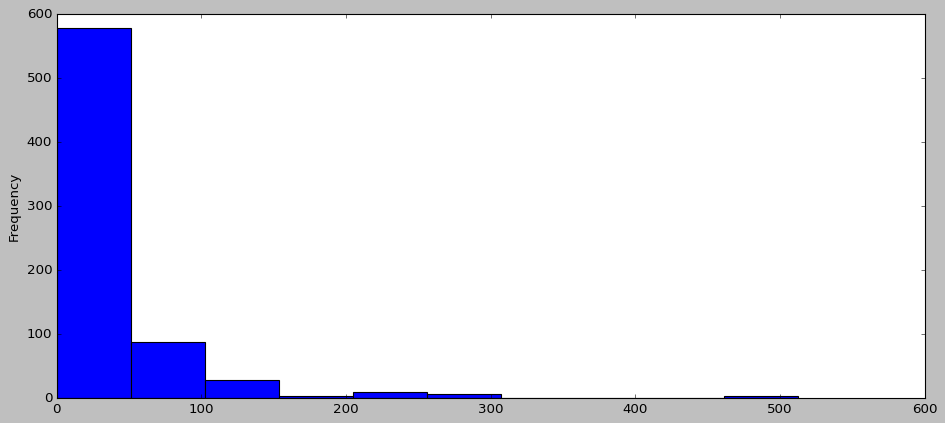

In [90]:
#fare is a continouos variable so can be displayed in
#a histogram  
titanic_data['Fare'].plot(kind='hist', figsize=(14,6));

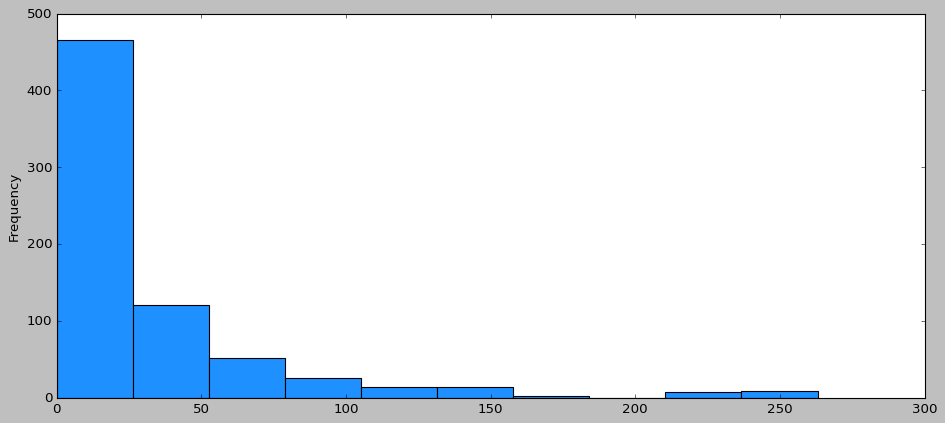

In [91]:
#removing the outliers

titanic_data = titanic_data[titanic_data['Fare']<500]
titanic_data['Fare'].plot(kind='hist', color='dodgerblue', figsize=(14,6));

In [92]:
#a continouos variable can be converted to a categorical variable 
#using binning
farebins=[0,8,15,33,512]
farelabels=['low', 'medium', 'high', 'vhigh']
titanic_data['fare_groups'] = pd.cut(titanic_data['Fare'], bins=farebins, labels=farelabels)
myresults = titanic_data['fare_groups'].value_counts().sort_index()
myresults

low       154
medium    189
high      185
vhigh     174
Name: fare_groups, dtype: int64

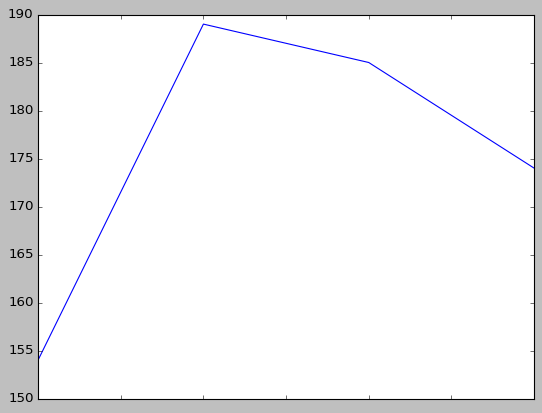

In [93]:
#sometimes it's important to specify the 
#range of your y-axis to get more accurate results. 'lim'='limits'
myresults.plot();
#using the code below the line in the plot goes all the way up
#why? because using ylim
#myresults.plot(ylim=(0,200));

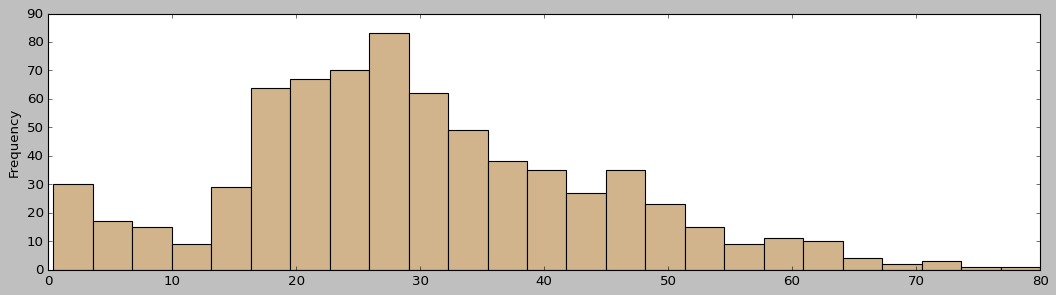

In [94]:
#displaying a single continous variable
#why continouos var because number can be modify or change any moment
titanic_data['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='tan');

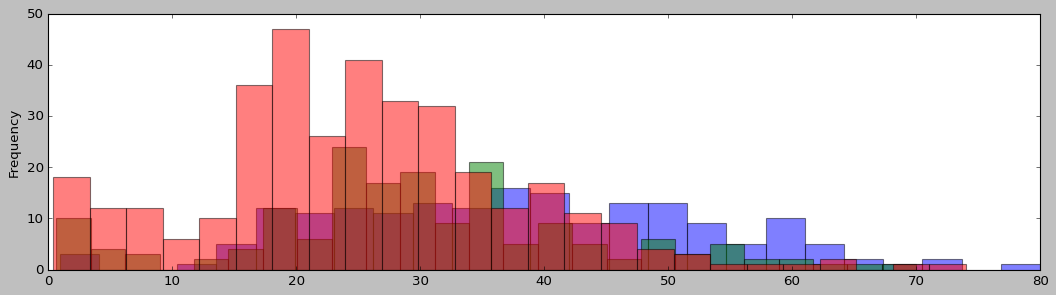

In [95]:
#this way is how we stacked a histogram of continuous variable, 
#broken out by categorical variable
#adding alpha degrade a the color of each histigram
titanic_data[titanic_data['Pclass']==1]['Age'].plot(kind='hist', bins=25, figsize=(16,4), alpha=0.5)
titanic_data[titanic_data['Pclass']==2]['Age'].plot(kind='hist', bins=25, figsize=(16,4), alpha=0.5)
titanic_data[titanic_data['Pclass']==3]['Age'].plot(kind='hist', bins=25, figsize=(16,4), alpha=0.5);

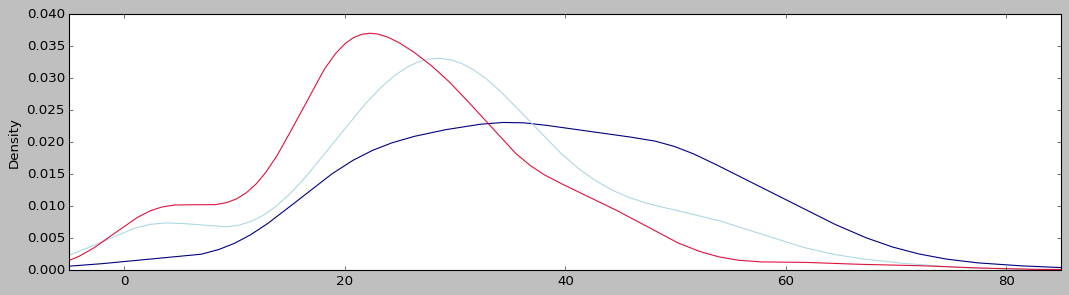

In [96]:
# But this is actually easier to read using a 
#Kernel Density Estimate (KDE). Note the use of 'xlim'.
titanic_data[titanic_data['Pclass']==1]['Age'].plot(kind='density', xlim=(-5, 85), figsize=(16,4), color='navy')
titanic_data[titanic_data['Pclass']==2]['Age'].plot(kind='density', xlim=(-5, 85), figsize=(16,4), color='lightblue')
titanic_data[titanic_data['Pclass']==3]['Age'].plot(kind='density', xlim=(-5, 85), figsize=(16,4), color='crimson');

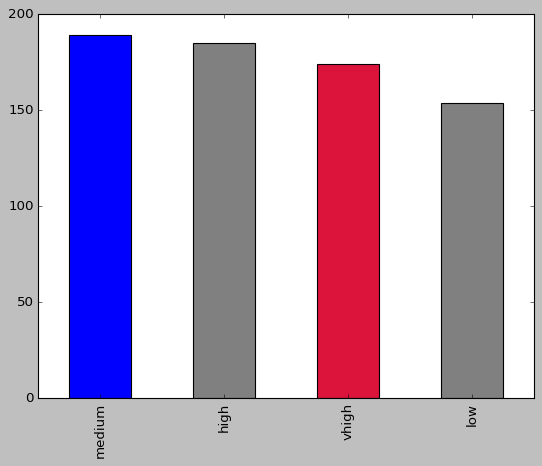

In [97]:
#Display a single categorical variable
# Bar chart. Use colors to make a particular value 'pop'!
#when you trying to add multiples colors to a bar it has to be in brackets
titanic_data['fare_groups'].value_counts().plot(kind='bar', color=['blue', 'gray', 'crimson','gray']);

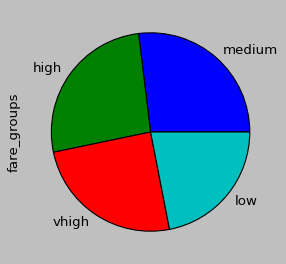

In [98]:
#using pie chart
titanic_data['fare_groups'].value_counts().plot(kind='pie', figsize=(4,4));

In [99]:
#Compare two categorical variables
# Compare two categorical variables using crosstab
cab_death = pd.crosstab(titanic_data['cab_class'], titanic_data['Survived'])
cab_death

Survived,0,1
cab_class,,
first,64,117
second,90,83
third,270,85


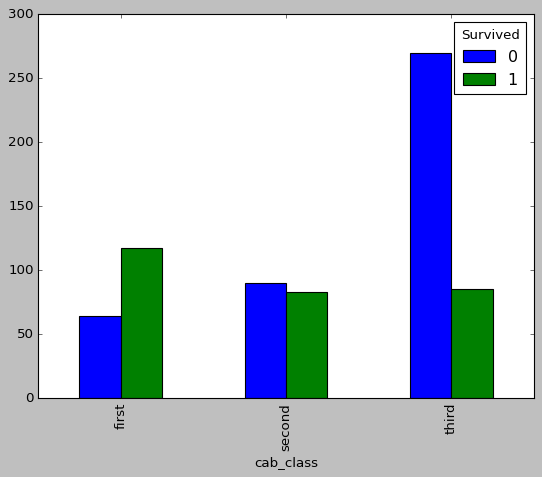

In [100]:
#lets make to a bar chart so can be read
cab_death.plot(kind='bar');

In [101]:
# lets Crosstab with column percents.
cab_death1 = pd.crosstab(titanic_data['cab_class'], titanic_data['Survived'], normalize='columns')
cab_death1

Survived,0,1
cab_class,,
first,0.150943,0.410526
second,0.212264,0.291228
third,0.636792,0.298246


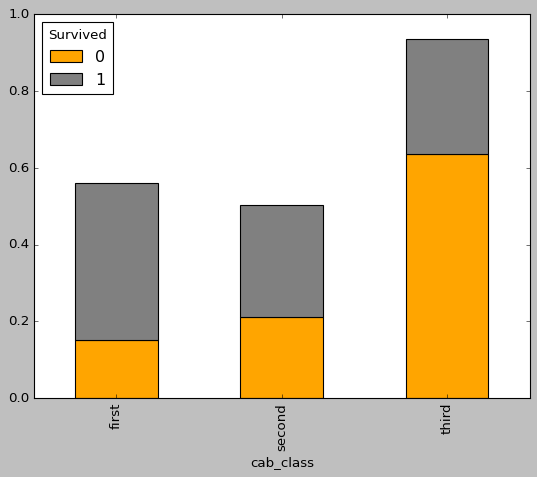

In [102]:
# make a stacked bar chart, for easy comparison of two categorical variables.
cab_death1.plot(kind='bar', stacked=True, color=['orange', 'gray']);

In [103]:
# Crosstab with column percents.
cab_death2 = pd.crosstab(titanic_data['cab_class'], titanic_data['Survived'], normalize='index')
cab_death2

Survived,0,1
cab_class,,
first,0.353591,0.646409
second,0.520231,0.479769
third,0.760563,0.239437


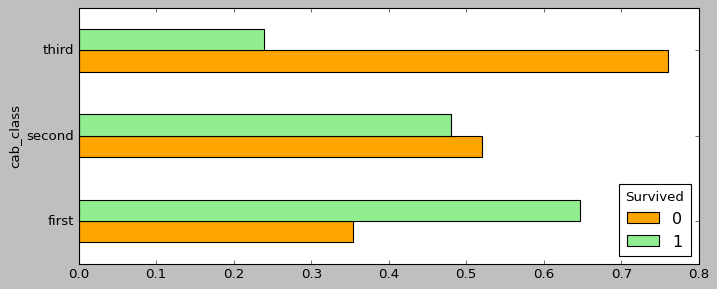

In [104]:
# A paired barchart for comparison of two categorical variables. Note the using of 'barh'.
cab_death2.plot(kind='barh', color=['orange', 'lightgreen'], figsize=(10,4));

In [105]:
#Compare a categorical and continuous variable
# Let's look at a single continuous variable
titanic_data['Age'].mean()

29.618011283497882

In [106]:
# Now explore that continuous variable broken out 
#by a categorical variable.
cab_age = titanic_data.groupby('cab_class')['Age'].mean()
cab_age


cab_class
first     38.151492
second    29.877630
third     25.140620
Name: Age, dtype: float64

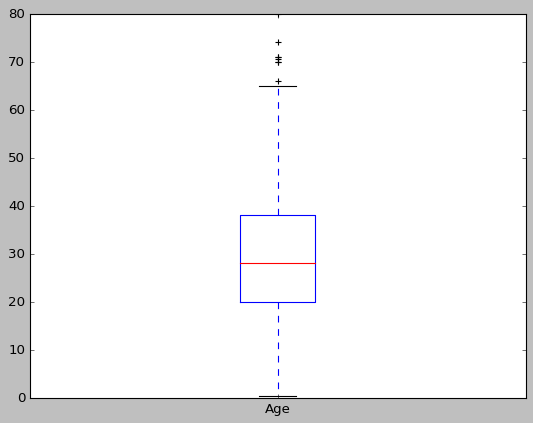

In [107]:
# To visualize a single continuous variable, 
#you can just use `.plot` with using`kind=box
titanic_data['Age'].plot(kind='box');


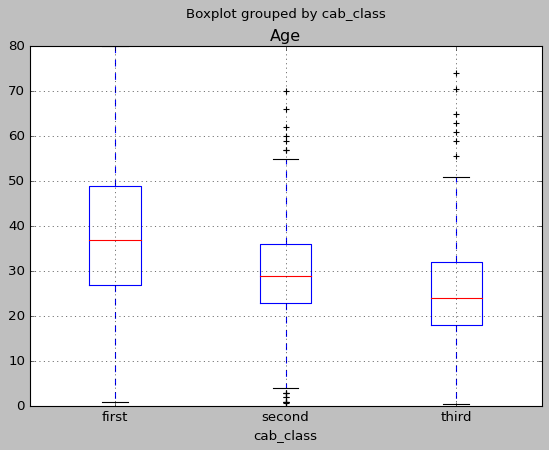

In [108]:
# But to break out a continuous variable 
#by a categorical variable, use `.boxplot`
titanic_data.boxplot(column='Age', by='cab_class');

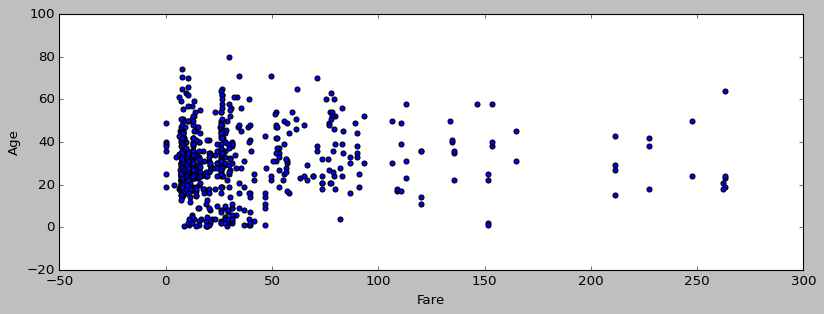

In [109]:
# Two continuous variables: age by fare
titanic_data.plot(kind='scatter', x='Fare', y='Age', figsize=(12,4));

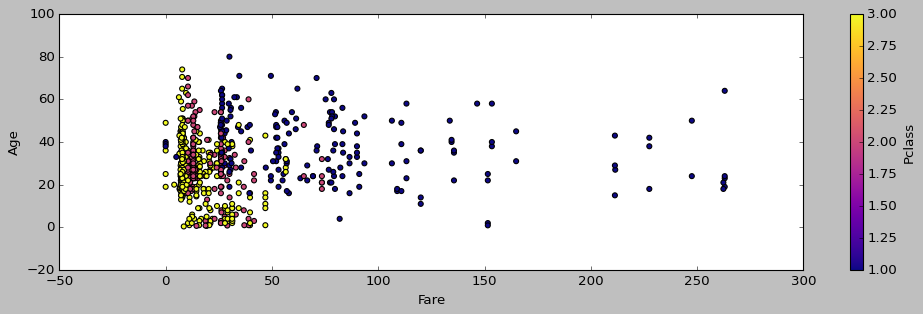

In [110]:
# Three variables: age, fare, and cabin class 
#(color can be either continuous or categorical here).
titanic_data.plot(kind='scatter', x='Fare', y='Age', c='Pclass', colormap='plasma', figsize=(15,4));

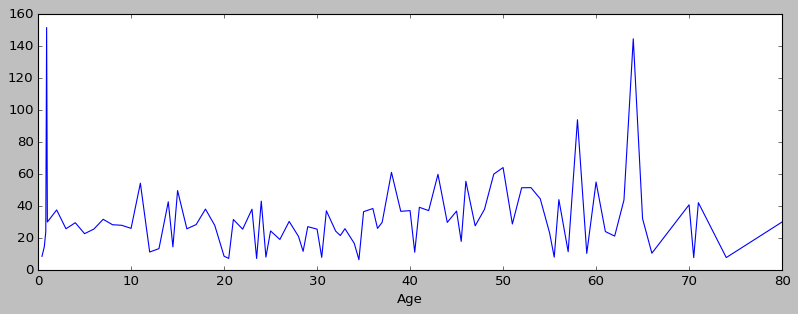

In [111]:
#Use a line plot to examine two continuous variables (often time)
# line chart: age by fare
titanic_data.groupby('Age')['Fare'].mean().plot(figsize=(12,4));

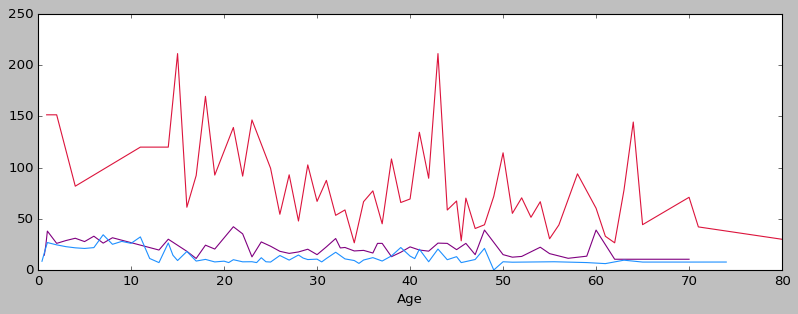

In [112]:
# Line chart: age by fare and cabin class
mycolors=['crimson', 'purple', 'dodgerblue']
# Rather than specifying 3 plots (as we did above, with the histogram)
# you can just loop through the values.
#beacuse we got 1,2,3 we need to specify mycolors with brackets x-1 so 
#the color can be apply properly
for x in [1,2,3]:
  titanic_data[titanic_data['Pclass']==x].groupby('Age')['Fare'].mean().plot(figsize=(12,4), color=mycolors[x-1])

In [113]:
#Compare multiple continuous variables
# Correlation Matrix
correr_matrix = titanic_data.corr()
correr_matrix

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


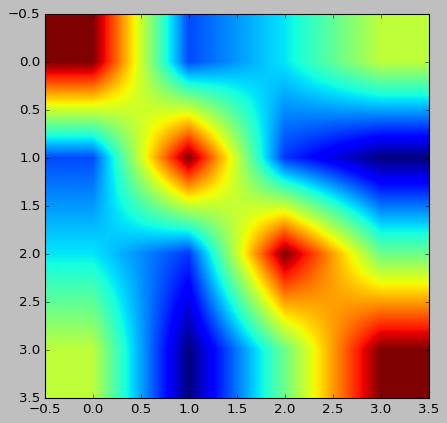

In [81]:
# Display the correlation matrix as a heatmap
plt.imshow(correr_matrix);

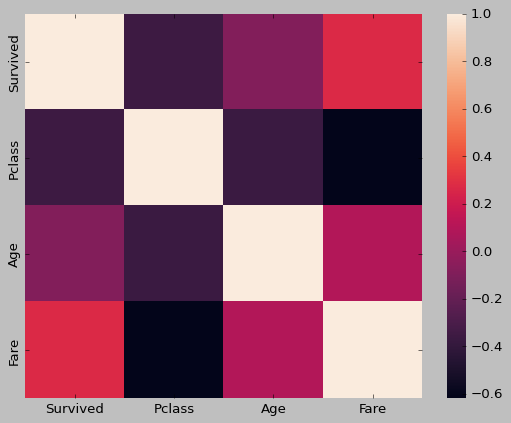

In [116]:
# More about seaborn further down.
sns.heatmap(correr_matrix);

##Intro to matplotlib

In [0]:
import numpy as np
x = np.linspace(0, 5, 11)
y = x ** 2

In [121]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [122]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

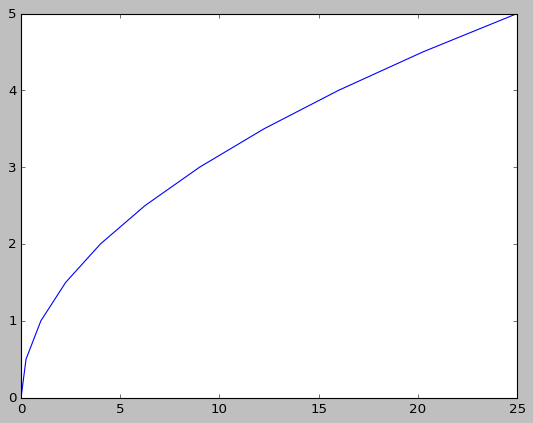

In [125]:
# a very simple plot, to get started. Notice that NO PANDAS is required!
plt.plot(y, x);

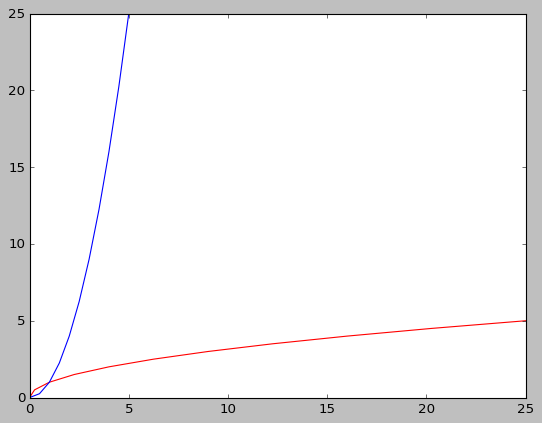

In [126]:
# You can have two 'plt' plots together (and let's add some color).
plt.plot(y, x, 'r')
plt.plot(x, y, 'b');

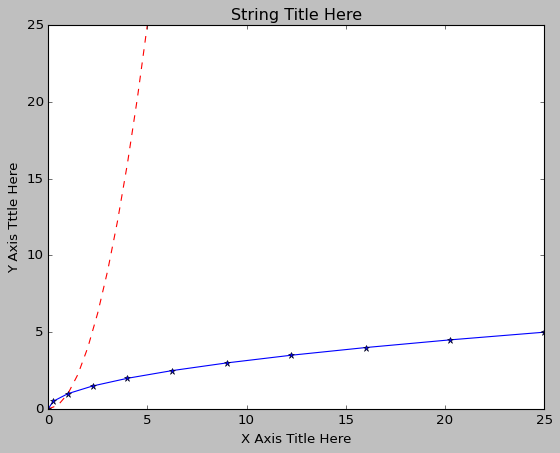

In [127]:
# Now add some labels, plus a little texture.
plt.plot(x, y, 'r--')
plt.plot(y, x, 'b*-')
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Tttle Here')
plt.title('String Title Here');

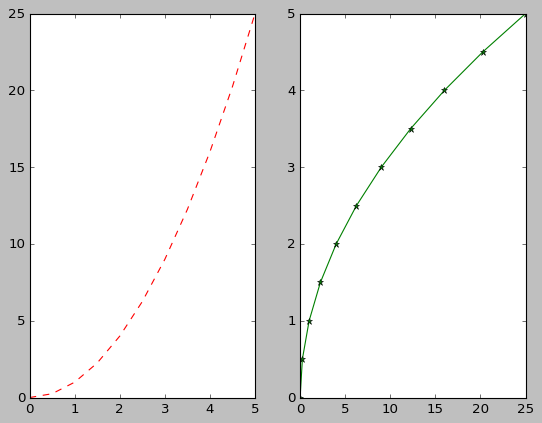

In [129]:
# The basic syntax goes like this: plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1)
plt.plot(x, y, 'r--')
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-');

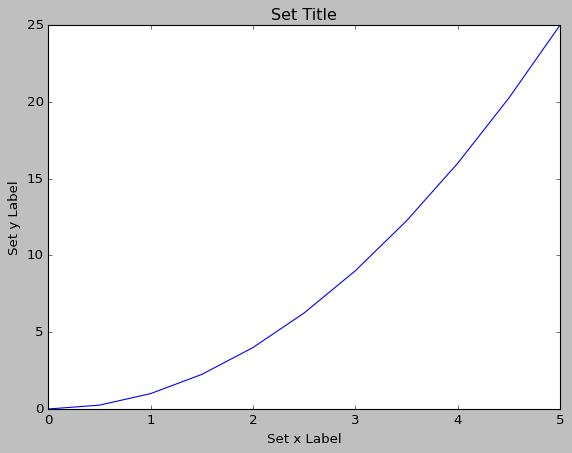

In [133]:
#The .figure() method

# Create Figure (empty canvas)
figu = plt.figure()

# Add set of axes to figure
                   # left, bottom, width, height (range 0 to 1)
axes = figu.add_axes([0.1,0.1,0.8,0.8])

# Plot on that set of axes
# Notice the use of set_ to begin methods
axes.plot(x, y, 'b')
axes.set_xlabel('Set x Label')
axes.set_ylabel('Set y Label') 
axes.set_title('Set Title');

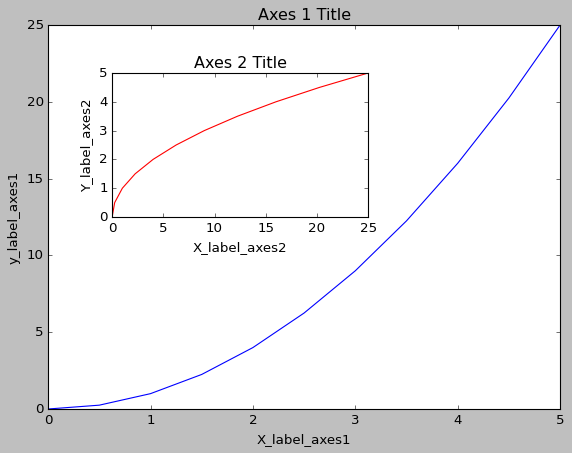

In [136]:
# Creates blank canvas
figu = plt.figure()
# main axes
# inset axes
axes1 = figu.add_axes([0.1, 0.1, 0.8, 0.8])
axes2 = figu.add_axes([0.2, 0.5, 0.4, 0.3])
# Larger Figure Axes 1
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes1')
axes1.set_ylabel('y_label_axes1')
axes1.set_title('Axes 1 Title')
# Insert Figure Axes 2
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title');

In [0]:
#The subplots() method
#figu, axes = plt.subplots()
#is more concise than this:
#fig = plt.figure()
#ax = fig.add_subplot(111)


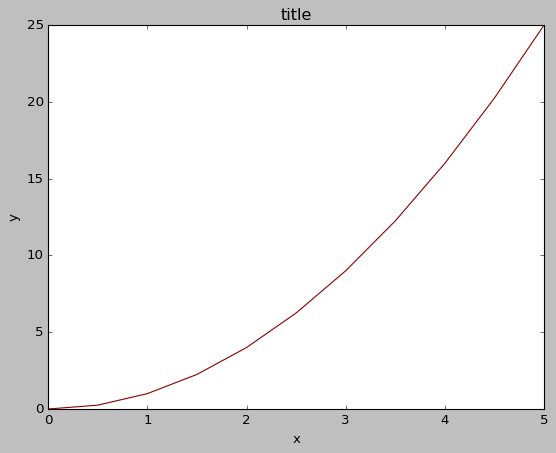

In [139]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
# The default is `(1, 1)` so you don't actually have to specify this.
fig, axes = plt.subplots(nrows=1, ncols=1)
# Now use the axes object to add stuff to plot
axes.plot(x, y, 'darkred')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

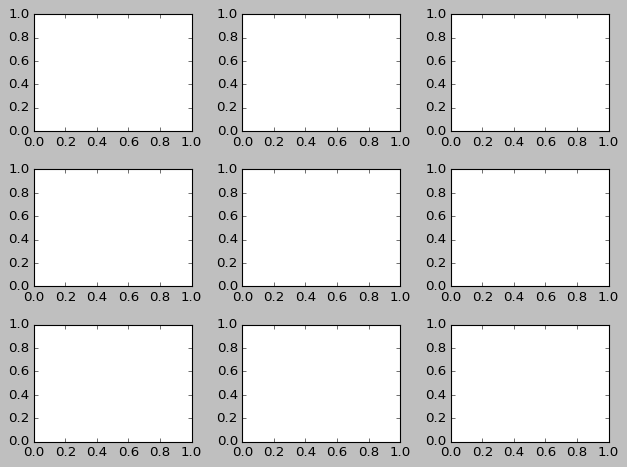

In [141]:
# Empty canvas of 1 by 2 subplots
# the parameter labels `nrows` and `ncols` are optional.
figu, axes = plt.subplots(nrows=3, ncols=3)
figu
plt.tight_layout();

In [142]:
# Axes is an array of axes to plot on
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7571661c18>,
      dtype=object)

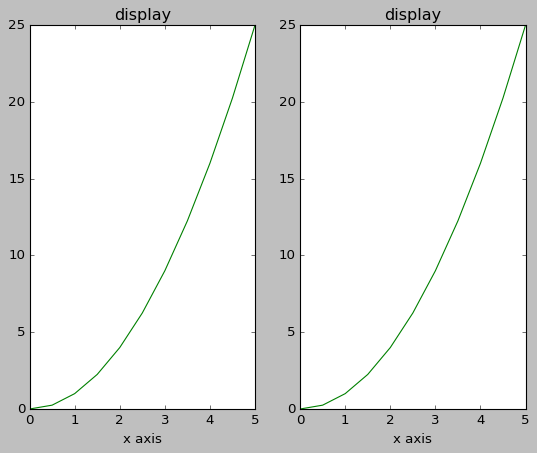

In [144]:
figu, axes = plt.subplots(nrows=1, ncols=2)
# Display the figure object
for ax in axes:
  ax.plot(x, y, 'g')
  ax.set_xlabel('x axis')
  ax.set_title('display')
  plt;

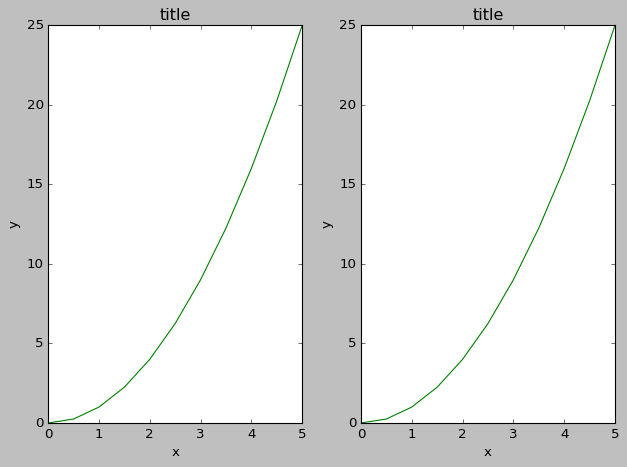

In [148]:
#this wai is to avoid no overlapping content:
figu, axes = plt.subplots(nrows=1, ncols=2)
for ax in axes:
  ax.plot(x, y, 'g')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_title('title')

figu
plt.tight_layout()

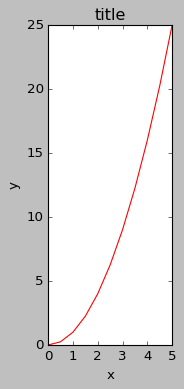

In [154]:
#figsize: is a tuple of the width and height of the figure in inches
#dpi: is the dots-per-inch (pixel per inch).
fig, axes = plt.subplots(figsize=(2,5))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');
#fig.savefig("filename.jpg", dpi=200)
#DPI can be use more for images

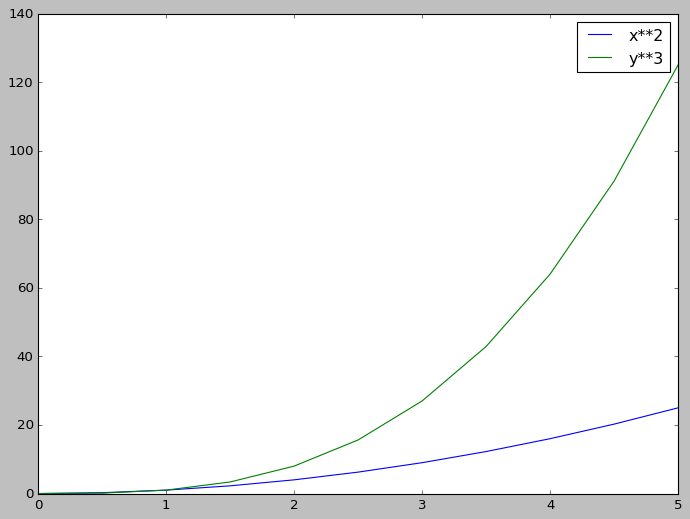

In [158]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax
ax.plot(x, x**2, label="x**2")
ax.plot(x, x**3, label="y**3")
ax.legend();

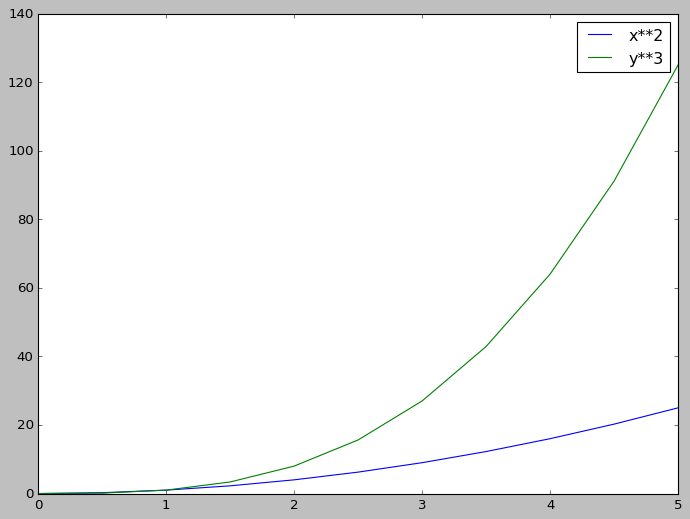

In [159]:
#more options

ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) #lowe left corner

# Try replacing the `loc` value with integers 1 through 10.
# let matplotlib decide the optinal location
ax.legend()
fig

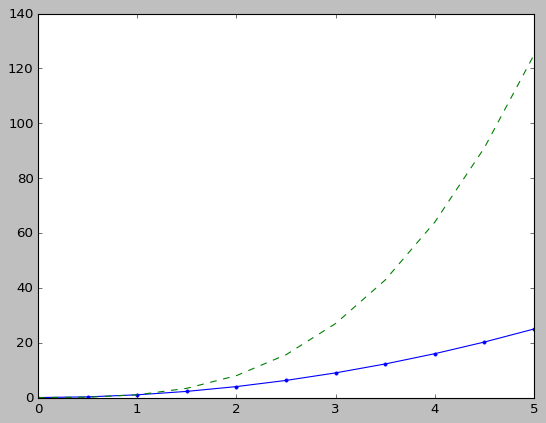

In [160]:
fig, ax = plt.subplots()
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

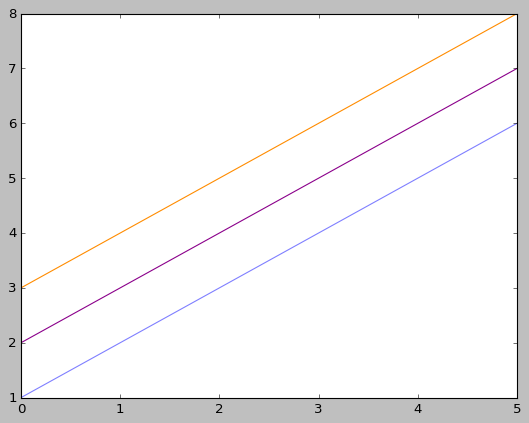

In [162]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="blue", alpha=0.5)#half-transparant
ax.plot(x, x+2, color="#8B008B")# RGB hex code
ax.plot(x, x+3, color="#FF8C00"); 


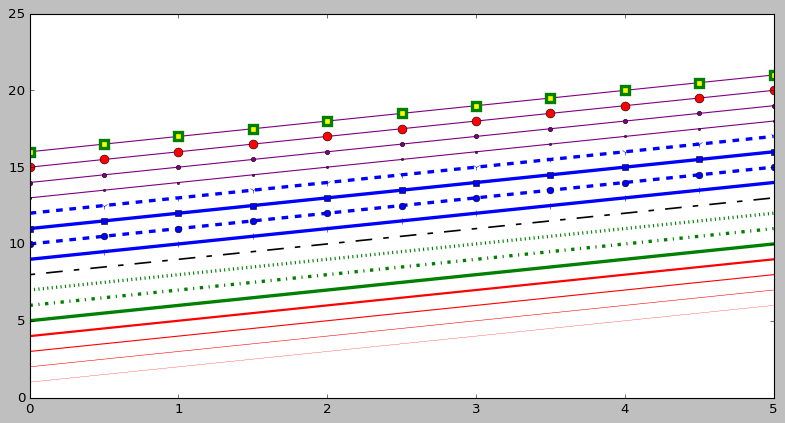

In [163]:
#linewidth=lw
#linestyle=ls
fig, axes = plt.subplots(figsize=(12,6))

axes.plot(x, x+1, color="red", linewidth=0.25)
axes.plot(x, x+2, color="red", linewidth=0.50)
axes.plot(x, x+3, color="red", linewidth=1.00)
axes.plot(x, x+4, color="red", linewidth=2.00)

#lines type options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
axes.plot(x, x+5, color="green", lw=3, linestyle='-')
axes.plot(x, x+6, color="green", lw=3, ls='-.')
axes.plot(x, x+7, color="green", lw=3, ls=':')

# custom dash
line, = axes.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) #format: line length, space length, ...

#marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
axes.plot(x, x+ 9, color="blue", lw=3, ls='-', marker='+')
axes.plot(x, x+10, color="blue", lw=3, ls='--', marker='o')
axes.plot(x, x+11, color="blue", lw=3, ls='-', marker='s')
axes.plot(x, x+12, color="blue", lw=3, ls='--', marker='1')

# marker size and color
axes.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
axes.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
axes.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
axes.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

In [168]:
from IPython.display import display, Image

picture = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=picture, width=400)

display(example)

In [173]:
print(plt.style.available[:5])
plt.style.use('fivethirtyeight')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background']


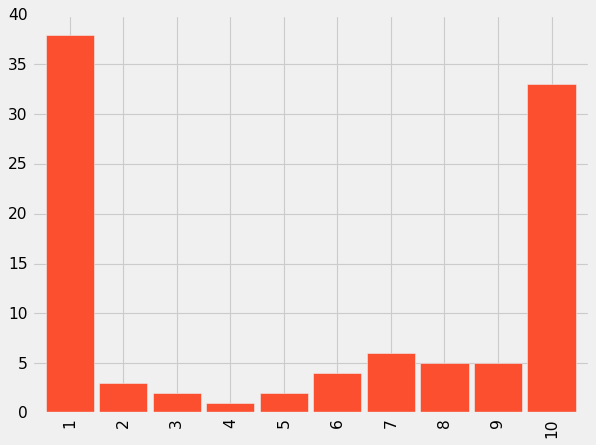

In [177]:
# Create fake data to replicate the blog post figure.
fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33],
                 index=range(1,11))
fake.plot.bar(color='C1', width=0.9);                

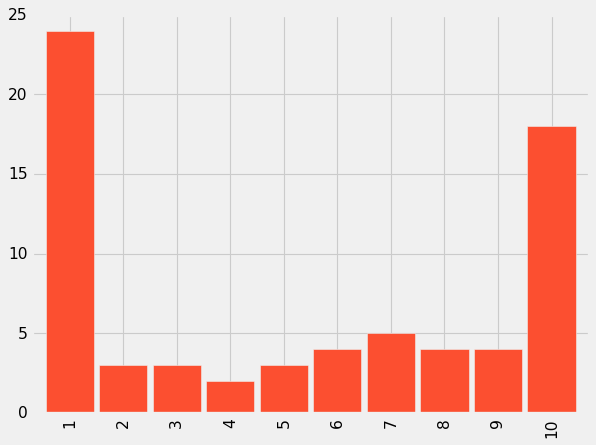

In [178]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 3, 3, 3, 4, 4, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8,
     9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

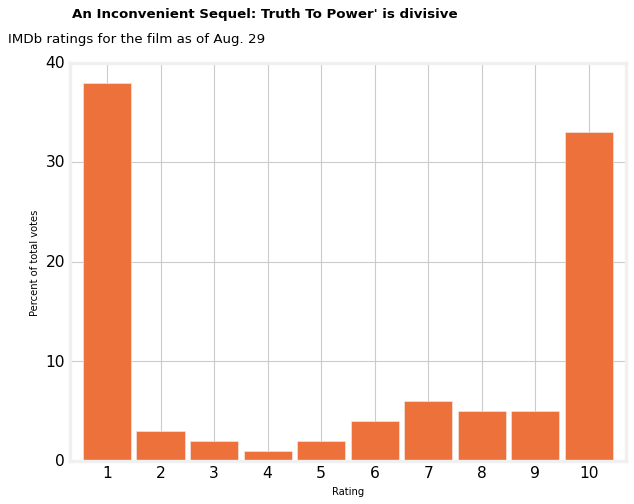

In [185]:
figu, axes = plt.subplots()
figu.patch.set(facecolor="white")
# Set the bars
fake.plot.bar(width=0.9, color="#ED713A")
axes.set(facecolor="white")
# Set the title and subtitle
axes.set_title("An Inconvenient Sequel: Truth To Power' is divisive",
               fontsize=12,
               x=.35,
               y=1.1,
               fontweight='bold')
axes.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42);
# Set the x and y axes labels
axes.set_xlabel("Rating", fontsize=9)
axes.set_ylabel("Percent of total votes", fontsize=9)
# Fix the x an y axis tick marks and grid
axes.set_xticklabels(range(1,11), rotation=0)
axes.set_yticklabels(range(0,50,10))
axes.set_yticks(range(0,50,10));


In [186]:
display(example)

##2.Reproduce another example from FiveThityEight's shared data repository.

In [15]:
nfl = pd.read_csv('https://projects.fivethirtyeight.com/nfl-api/nfl_elo_latest.csv')
nfl.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,qbelo1_pre,qbelo2_pre,qb1,qb2,qb1_value_pre,qb2_value_pre,qb1_adj,qb2_adj,qbelo_prob1,qbelo_prob2,qb1_game_value,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2
0,2019-09-05,2019,0,NaN,CHI,GB,1588.897931,1455.131370,0.758449,0.241551,1554.222031,1489.807271,1560.453690,1519.195907,Mitchell Trubisky,Aaron Rodgers,174.958269,191.502166,5.972962,2.878460,0.640182,0.359818,-36.627083,74.729307,153.799734,179.824881,1532.560287,1547.089310,3,10
1,2019-09-08,2019,0,NaN,JAX,KC,1455.249073,1602.077427,0.384370,0.615630,1435.177771,1622.148729,1483.650361,1607.646375,Nick Foles,Patrick Mahomes,171.837105,221.811811,14.392350,6.970182,0.415645,0.584355,88.354740,433.187480,163.488868,242.949378,1461.728341,1629.568396,26,40
2,2019-09-08,2019,0,NaN,CAR,LAR,1519.378772,1598.015666,0.480385,0.519615,1506.141723,1611.252716,1513.588466,1590.227021,Cam Newton,Jared Goff,177.316184,154.324046,1.455572,-2.025650,0.475030,0.524970,49.375757,64.164228,164.522141,145.308064,1500.520997,1603.294491,27,30
3,2019-09-08,2019,0,NaN,NYJ,BUF,1384.966442,1448.423682,0.502220,0.497780,1377.999306,1455.390818,1451.591031,1462.674073,Sam Darnold,Josh Allen,115.484414,151.007170,-0.072717,12.822435,0.546114,0.453886,112.062742,182.005072,115.142247,154.106960,1443.908065,1470.357039,16,17
4,2019-09-08,2019,0,NaN,CLE,TEN,1455.886401,1518.907204,0.502848,0.497152,1421.319814,1553.473791,1508.718318,1502.788081,Baker Mayfield,Marcus Mariota,172.003093,129.516332,7.658328,-0.985091,0.601345,0.398655,-11.008486,197.932531,153.701935,136.357952,1466.032539,1545.473861,13,43


In [16]:
nfl.tail()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,qbelo1_pre,qbelo2_pre,qb1,qb2,qb1_value_pre,qb2_value_pre,qb1_adj,qb2_adj,qbelo_prob1,qbelo_prob2,qb1_game_value,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2
262,2020-01-12,2019,0,d,KC,HOU,1694.572097,1552.346950,0.767256,0.232744,1707.523977,1539.395070,1694.568993,1557.968405,Patrick Mahomes,Deshaun Watson,245.735426,194.204879,9.554129,3.138562,0.826138,0.173862,438.446627,334.912841,265.006546,208.275675,1703.995494,1548.541903,51,31
263,2020-01-12,2019,0,d,GB,SEA,1631.858399,1579.312894,0.662990,0.337010,1643.322690,1567.848604,1636.847937,1562.698151,Aaron Rodgers,Russell Wilson,170.356128,186.098767,-11.632378,-2.372472,0.740069,0.259931,186.037709,257.002585,171.924286,193.189149,1645.451747,1554.094341,28,23
264,2020-01-19,2019,0,c,KC,TEN,1707.523977,1662.579362,0.653145,0.346855,1723.941560,1646.161779,1703.995494,1643.185493,Patrick Mahomes,Ryan Tannehill,265.006546,172.615357,18.711982,17.983259,0.693796,0.306204,401.937351,198.013490,278.699626,175.155170,1718.290032,1628.890956,35,24
265,2020-01-19,2019,0,c,SF,GB,1651.872498,1643.322690,0.604293,0.395707,1674.007279,1621.187909,1658.178853,1645.451747,Jimmy Garoppolo,Aaron Rodgers,141.312649,171.924286,-2.860354,-10.266680,0.638694,0.361306,54.368746,220.084523,132.618259,176.740310,1678.165910,1625.464690,37,20
266,2020-02-02,2019,1,s,KC,SF,1723.941560,1674.007279,0.571370,0.428630,1744.770876,1653.177962,1718.290032,1678.165910,Patrick Mahomes,Jimmy Garoppolo,278.699626,132.618259,24.622923,-7.064531,0.630309,0.369691,162.186588,98.649107,267.048323,129.221343,1735.920251,1660.535691,31,20


In [17]:
nfl.shape

(267, 30)

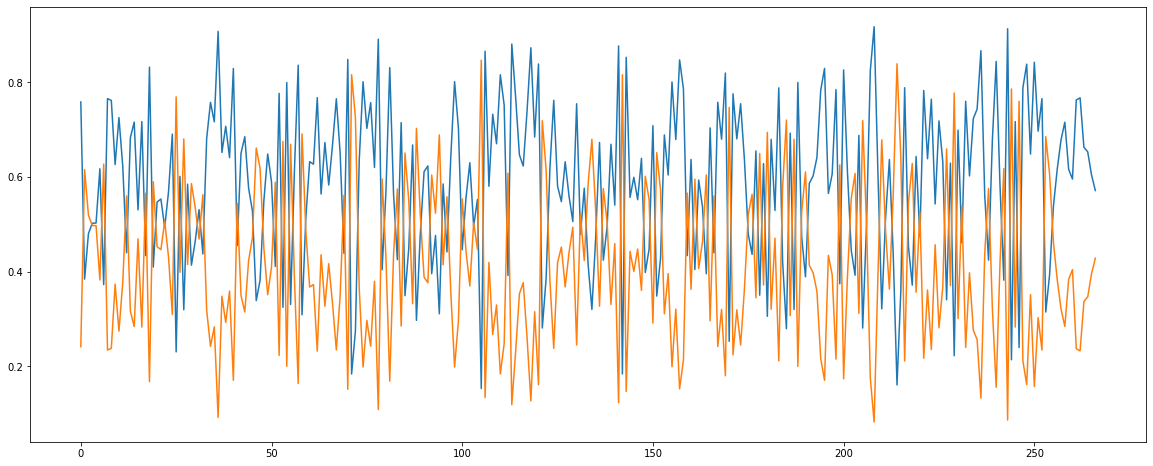

In [18]:
nfl['elo_prob1'].plot(kind='line', figsize=(25,8))
nfl['elo_prob2'].plot(kind='line', figsize=(20,8));

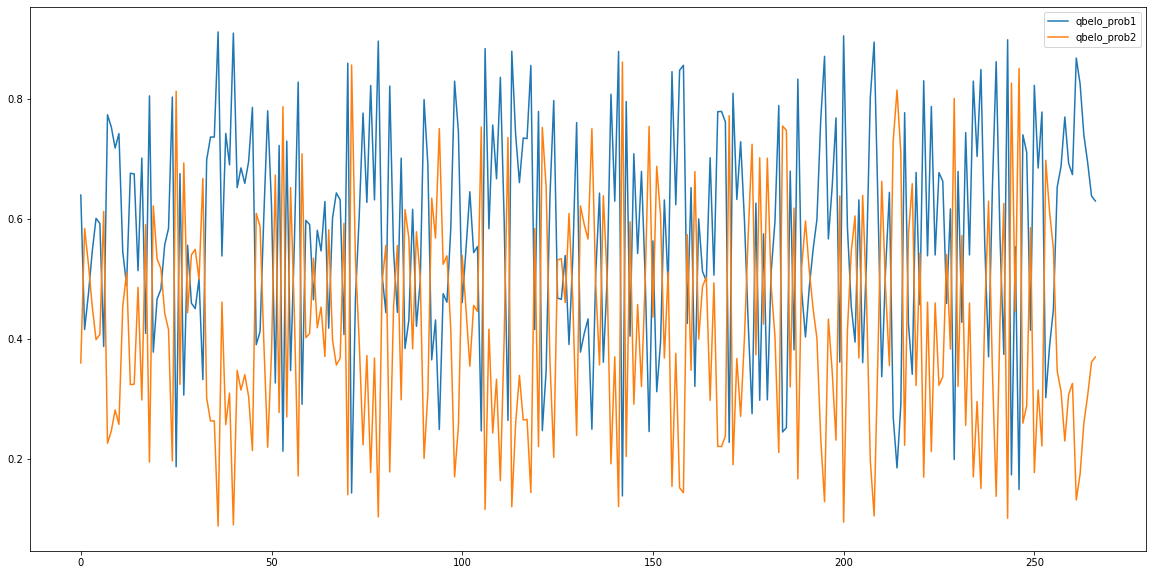

In [45]:
mynfl.plot(kind='line', figsize=(20,10));

In [72]:
mynfl = nfl[['qbelo_prob1', 'qbelo_prob2']]
mynfl.head()

,qbelo_prob1,qbelo_prob2
0,0.640182,0.359818
1,0.415645,0.584355
2,0.475030,0.524970
3,0.546114,0.453886
4,0.601345,0.398655


In [73]:
mynfl.columns.to_list()

['qbelo_prob1', 'qbelo_prob2']

In [0]:
mynfl.index.to_list()

In [76]:
mynfl2 = mynfl.reset_index()
mynfl2

,index,qbelo_prob1,qbelo_prob2
0,0,0.640182,0.359818
1,1,0.415645,0.584355
2,2,0.475030,0.524970
3,3,0.546114,0.453886
4,4,0.601345,0.398655
...,...,...,...
262,262,0.826138,0.173862
263,263,0.740069,0.259931
264,264,0.693796,0.306204
265,265,0.638694,0.361306


In [0]:
#i did a tidy move so i can have a better grah
mynfl2 = mynfl.T

In [81]:
mynfl2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266
qbelo_prob1,0.640182,0.415645,0.47503,0.546114,0.601345,0.592845,0.38725,0.77439,0.75384,0.718805,0.74293,0.545569,0.48963,0.676629,0.67567,0.513942,0.702107,0.409146,0.805902,0.377841,0.466439,0.482772,0.557226,0.584538,0.80402,0.186361,0.676157,0.30607,0.556322,0.459613,0.450448,0.500309,0.33198,0.698684,0.73724,0.737074,0.912828,0.538457,0.743268,0.690695,...,0.459184,0.617119,0.198253,0.679643,0.427552,0.744613,0.540204,0.830631,0.704636,0.849925,0.559227,0.369938,0.649881,0.86306,0.570621,0.373988,0.899677,0.17271,0.554086,0.148277,0.740927,0.711657,0.414259,0.823481,0.685372,0.779012,0.301712,0.388117,0.449329,0.653604,0.687783,0.770683,0.692983,0.674369,0.869167,0.826138,0.740069,0.693796,0.638694,0.630309
qbelo_prob2,0.359818,0.584355,0.52497,0.453886,0.398655,0.407155,0.61275,0.22561,0.24616,0.281195,0.25707,0.454431,0.51037,0.323371,0.32433,0.486058,0.297893,0.590854,0.194098,0.622159,0.533561,0.517228,0.442774,0.415462,0.19598,0.813639,0.323843,0.69393,0.443678,0.540387,0.549552,0.499691,0.66802,0.301316,0.26276,0.262926,0.087172,0.461543,0.256732,0.309305,...,0.540816,0.382881,0.801747,0.320357,0.572448,0.255387,0.459796,0.169369,0.295364,0.150075,0.440773,0.630062,0.350119,0.13694,0.429379,0.626012,0.100323,0.82729,0.445914,0.851723,0.259073,0.288343,0.585741,0.176519,0.314628,0.220988,0.698288,0.611883,0.550671,0.346396,0.312217,0.229317,0.307017,0.325631,0.130833,0.173862,0.259931,0.306204,0.361306,0.369691


In [82]:
mynfl3 = mynfl2[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
mynfl3.head()

,0,1,2,3,4,5,6,7,8,9,10
qbelo_prob1,0.640182,0.415645,0.47503,0.546114,0.601345,0.592845,0.38725,0.77439,0.75384,0.718805,0.74293
qbelo_prob2,0.359818,0.584355,0.52497,0.453886,0.398655,0.407155,0.61275,0.22561,0.24616,0.281195,0.25707


In [83]:
mynfl3.index.to_list()

['qbelo_prob1', 'qbelo_prob2']

In [0]:
mynfl4 = mynfl3.reset_index()

In [86]:
mynfl4.head()

,index,0,1,2,3,4,5,6,7,8,9,10
0,qbelo_prob1,0.640182,0.415645,0.47503,0.546114,0.601345,0.592845,0.38725,0.77439,0.75384,0.718805,0.74293
1,qbelo_prob2,0.359818,0.584355,0.52497,0.453886,0.398655,0.407155,0.61275,0.22561,0.24616,0.281195,0.25707


In [0]:
from math import pi

In [0]:
categories=list(mynfl4)[1:]
N = len(categories)

In [135]:
# i replicate the first number to the las position to have
#a circular data 
values=mynfl4.loc[0].drop('index').values.flatten().tolist()
values += values[:1]
values

[0.64018164190049,
 0.41564481890162996,
 0.475029617040791,
 0.546113784234279,
 0.601345066440458,
 0.5928448333876171,
 0.387249691884048,
 0.774389549700803,
 0.7538397022753249,
 0.7188047422770931,
 0.7429302987116179,
 0.64018164190049]

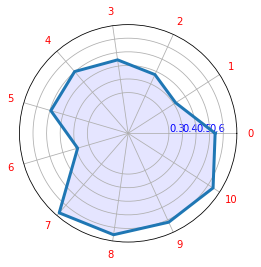

In [168]:
#the angle of each axis we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels 
plt.xticks(angles[:-1], categories, color='red', size=10)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.3,0.4,0.5,0.6,0.7,], ["0.3","0.4","0.5", "0.6"], color="blue", size=10)
plt.ylim(-0,0.8)
 
# Plot data
ax.plot(angles, values, linewidth=3, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1);

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here